In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import warnings

1. Data Exploration:

In [2]:
titanic_train= pd.read_csv("Titanic_train.csv")
titanic_test=pd.read_csv("Titanic_test.csv")

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_train[titanic_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
titanic_train.isnull().sum().sum()

np.int64(866)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Fill missing values
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

In [9]:
# Drop unnecessary columns
titanic_train = titanic_train.drop(["Name", "Ticket", "Cabin"], axis=1)

In [10]:
titanic_train.shape

(891, 9)

In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


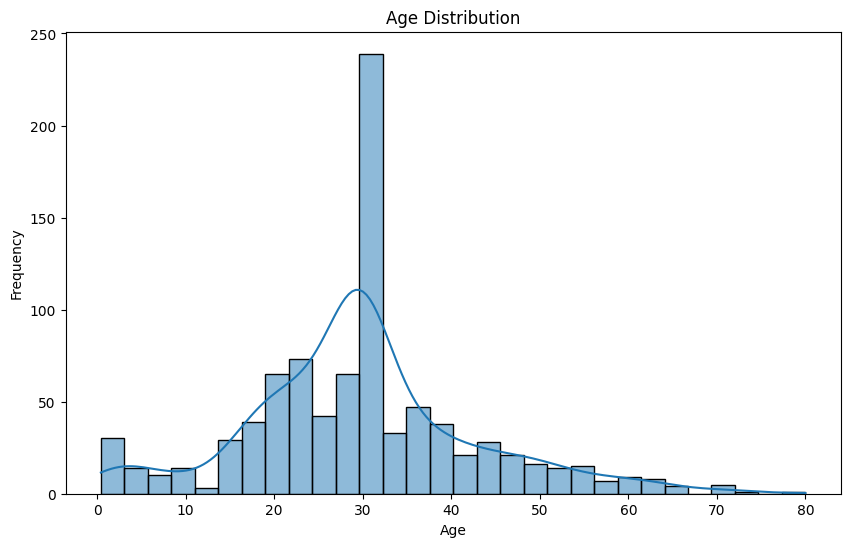

In [13]:
#Visualization 

#histogram
plt.figure(figsize=(10,6))
sns.histplot(titanic_train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Outlier detection and removal using IQR method
Q1 = titanic_train["Age"].quantile(0.25)
Q3 = titanic_train["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train = titanic_train[(titanic_train["Age"] >= lower_bound) & (titanic_train["Age"] <= upper_bound)]

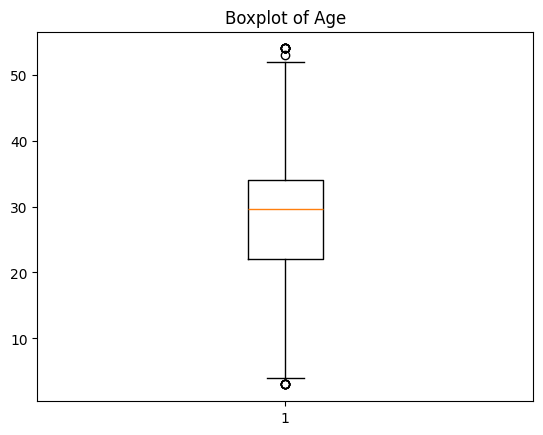

In [15]:
plt.boxplot(titanic_train["Age"])
plt.title("Boxplot of Age")
plt.show()

In [16]:
# Outlier detection and removal using IQR method
Q1 = titanic_train["Fare"].quantile(0.25)
Q3 = titanic_train["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train = titanic_train[(titanic_train["Fare"] >= lower_bound) & (titanic_train["Fare"] <= upper_bound)]

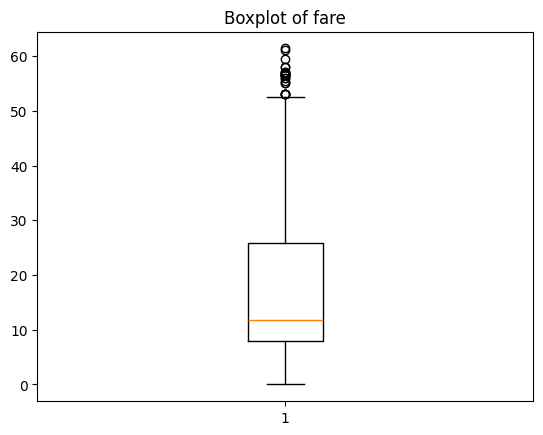

In [17]:
plt.boxplot(titanic_train["Fare"])
plt.title("Boxplot of fare")
plt.show()

In [18]:
#TEST DATA PREPROCESSING

In [19]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [20]:
# Drop unnecessary columns
titanic_test = titanic_test.drop(["Name", "Ticket", "Cabin"], axis=1)

In [21]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [22]:
# Fill missing values
titanic_test["Fare"].fillna(titanic_test["Fare"].mean(), inplace=True)
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)

In [23]:
titanic_test[titanic_test.duplicated()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [24]:
titanic_test.isnull().sum().sum()

np.int64(0)

In [25]:
titanic_test.shape

(418, 8)

In [26]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [27]:
warnings.filterwarnings("ignore")

In [28]:
#Encode with label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_train["Sex"] = le.fit_transform(titanic_train["Sex"])
titanic_test["Sex"] = le.fit_transform(titanic_test["Sex"])
titanic_test["Pclass"] = le.fit_transform(titanic_test["Pclass"])
print(le)

LabelEncoder()


In [29]:
le_E = LabelEncoder()
titanic_train["Embarked"] = le.fit_transform(titanic_train["Embarked"])

3. Model Building:

In [ ]:
''' a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
''' 

In [30]:
#Dividing the data into X and Y 
X = titanic_train.drop("Survived", axis=1)
y = titanic_train["Survived"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(574, 8) (144, 8) (574,) (144,)


In [33]:
#logistic regression & fitting the model
lr=LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
import pickle
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [ ]:
#Evaluate the performance of the model on the testing data 
#using accuracy, precision, recall, F1-score, and ROC-AUC score.

#ROC & AUC are used only for binary response
#AUC- shows how much area is covering, the more area it covers that much good it is.

In [35]:
y_pred = lr.predict(x_test)
y_proba = lr.predict_proba(x_test)[:,1]

In [36]:
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_proba)
}

In [37]:
metrics

{'accuracy': 0.7708333333333334,
 'precision': 0.6818181818181818,
 'recall': 0.6122448979591837,
 'f1_score': 0.6451612903225806,
 'roc_auc': 0.8253490870032224}

In [38]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)  
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[81 14]
 [19 30]]


ROC CURVE

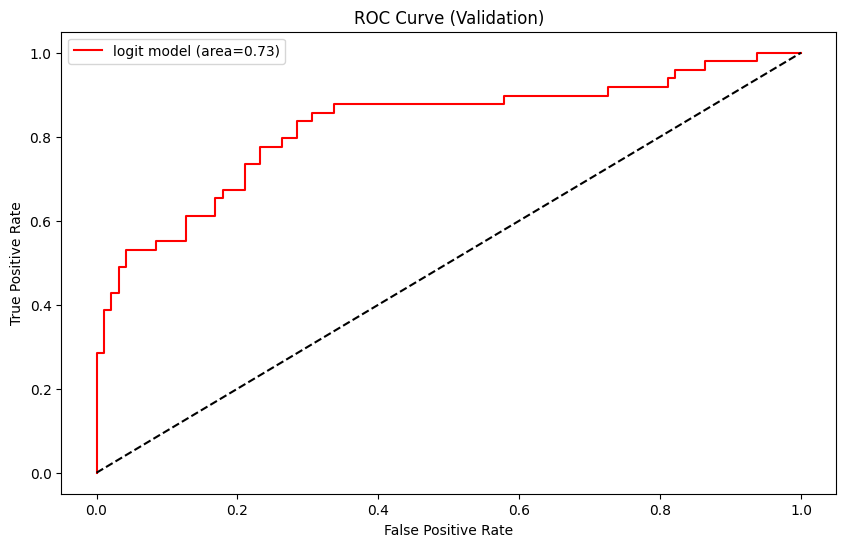

In [39]:
#ROC CURVE

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='red', label='logit model (area=%0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
         

5. Interpretation

In [40]:
#Interpretation
coeff = lr.coef_[0]
intercept=lr.intercept_[0]
print("Coefficients: ", coeff)
print("Intercept: ", intercept)

Coefficients:  [-3.22067179e-04 -7.40852938e-01 -2.54613954e+00 -4.00430291e-02
 -4.30101639e-01 -2.20547108e-01  3.06531599e-02 -1.89611372e-01]
Intercept:  3.9898463343924595


6. Deployment with streamlit

In [47]:
'''
code_streamlit=
import pandas as pd
import numpy as np
import streamlit as st 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle

#Load the Titanic dataset
titanic_train = pd.read_csv("C:/Users/K. BHAVANI/OneDrive/Desktop/data science-exclr/assignments/Logistic Regression/Titanic_train.csv")

#Preprocess the data 

titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

#initializing label encoder
le = LabelEncoder()
titanic_train["Sex"] = le.fit_transform(titanic_train["Sex"])


le_E = LabelEncoder()
titanic_train["Embarked"] = le.fit_transform(titanic_train["Embarked"])

#Dividing the data into X and Y 
X = titanic_train.drop("Survived", axis=1)
y = titanic_train["Survived"]

#logistic regression & fitting the model
lr=LogisticRegression()
lr.fit(x_train,y_train)


# Streamlit app
st.title('Titanic Ship Passengers Survival Prediction App')
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.slider('Age', 1, 100)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8)
parch = st.slider('Number of Parents/Children Aboard', 0, 6)
fare = st.slider('Fare Paid', 0, 500)
embarked = st.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

# Convert input to the encoded format for the model
input_data = [
    pclass,
    le.transform([sex.lower()])[0],
    age,
    sibsp,
    parch,
    fare,
    le_E.transform([embarked])[0]
]

if st.button('Predict Survival'):
    prediction = lr.predict([input_data])[0]
    probability = lr.predict_proba([input_data])[0][1]
    st.write(f"Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'}")
    st.write(f"Probability of Survival: {probability:.2f}")


'''

'\ncode_streamlit=\nimport pandas as pd\nimport numpy as np\nimport streamlit as st \nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.preprocessing import LabelEncoder\nimport pickle\n\n#Load the Titanic dataset\ntitanic_train = pd.read_csv("C:/Users/K. BHAVANI/OneDrive/Desktop/data science-exclr/assignments/Logistic Regression/Titanic_train.csv")\n\n#Preprocess the data \n\ntitanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)\ntitanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)\n\n#initializing label encoder\nle = LabelEncoder()\ntitanic_train["Sex"] = le.fit_transform(titanic_train["Sex"])\n\n\nle_E = LabelEncoder()\ntitanic_train["Embarked"] = le.fit_transform(titanic_train["Embarked"])\n\n#Dividing the data into X and Y \nX = titanic_train.drop("Survived", axis=1)\ny = titanic_train["Survived"]\n\n#logistic regression & fitting the model\nlr=LogisticRegression()\nlr.fit(x_train,y_train)\n\n\n# Streamlit app\nst.tit